Analyses of generated data, to understand accuracy issues

In [47]:
import json
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as pathlib

In [43]:
datadir = Path('./simulated_data/pseudosubjects')
datafiles = [i for i in datadir.glob('*.csv')]
print(f'found {len(datafiles)} datafiles')

data = {}
params = {}
metrics = {}

for d in datafiles:
    subcode = d.name.split('.')[0]
    data[subcode] = pd.read_csv(d, index_col=0)
    with open(d.as_posix().replace('.csv', '.json')) as f:
        params[subcode] = json.load(f)
    with open(d.as_posix().replace('.csv', '_metrics.json')) as f:
        metrics[subcode] = json.load(f)


found 24 datafiles


In [50]:
stop_data = {}
go_acc = {}
go_rt = {}
for subcode in data:
        mean_rtdata = data[subcode].groupby('SSD').mean()
        stop_data[subcode] = mean_rtdata.query('SSD >= 0')
        go_rt[subcode] = mean_rtdata.query('SSD < 0').loc[-np.inf, 'rt']
        go_acc[subcode] = data[subcode].query('trialtype=="go"').correct.mean()


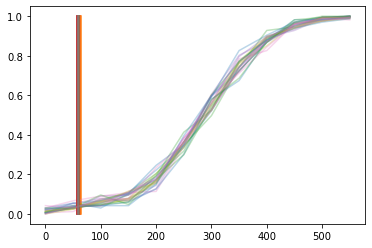

In [58]:
for subcode in data:
    plt.plot(stop_data[subcode].index, stop_data[subcode].resp, alpha=0.3)
    plt.plot([metrics[subcode]['SSRT']['integration'], metrics[subcode]['SSRT']['integration']], [0, 1])
plt.ylabel('p_stop_success')
plt.xlabel('SSD')
plt.savefig('integration_pstop.png')

In [56]:
metrics[subcode]

{'SSRT': {'mean': 84.1302865859758,
  'integration': 63.17500000000001,
  'omission': 63.17500000000001,
  'replacement': 63.17500000000001},
 'mean_SSD': 274.825,
 'p_respond': 0.4895,
 'max_RT': 980.0,
 'mean_go_RT': 358.9552865859758,
 'mean_stopfail_RT': 384.90806945863125,
 'omission_count': 3,
 'omission_rate': 0.0003,
 'go_acc': 0.9366810043012904,
 'stopfail_acc': 0.81511746680286}